In [113]:
import pandas as pd
import sklearn
import matplotlib.pyplot as  plt
import random as rd
import numpy as np
from scipy.stats import skewnorm  
import scipy.stats as stats


In [122]:
def generate_gene_level(loc, scale, a, size=10000):# Parameters to center distribution at 0.3
    #loc location parameter (mean)
    #scale spread of distribution
    #a skew parameter

    # Generate skewed distribution
    skewed_data = stats.skewnorm.rvs(a, loc=loc, scale=scale, size=size)
    return list(skewed_data)

In [120]:
generate_gene_level(loc=0.2,scale=0.07,a=0.5)

array([0.285323  , 0.15670199, 0.31556778, ..., 0.30578329, 0.24698571,
       0.25254113])

In [121]:
rd.sample(list(generate_gene_level(loc=0.2,scale=0.07,a=0.5)), 500)

[np.float64(0.18767469262796185),
 np.float64(0.31558913308026937),
 np.float64(0.2978793637961372),
 np.float64(0.11521475984392227),
 np.float64(0.21858692751771966),
 np.float64(0.14998194167366907),
 np.float64(0.24053160818905728),
 np.float64(0.2867522939526132),
 np.float64(0.2690994353322408),
 np.float64(0.2763379299680558),
 np.float64(0.11609945942813349),
 np.float64(0.21854240395130278),
 np.float64(0.17549878817410594),
 np.float64(0.2731810780607228),
 np.float64(0.17396523146875353),
 np.float64(0.21226916227140447),
 np.float64(0.1935306222776093),
 np.float64(0.09832634693697911),
 np.float64(0.1255002852266353),
 np.float64(0.22530089282456323),
 np.float64(0.1901940801694849),
 np.float64(0.11216524545939868),
 np.float64(0.2937617316218975),
 np.float64(0.20058051405756003),
 np.float64(0.059302170805438925),
 np.float64(0.16129191241891838),
 np.float64(0.18879827967613486),
 np.float64(0.20391645308965045),
 np.float64(0.19966445953779505),
 np.float64(0.18989132

In [1]:
def map_to_snp(value):
    if value < 1/3:
        return 0
    elif value < 2/3:
        return 1
    else:
        return 2

In [ ]:
from faker import Faker

country=['UK',"USA","France","Spain","Italy"]
education_level=['primary', 'high school','bachelor', 'master', 'phD']
dict_country={'UK':['London','Cardiff','Edimburgh'],'USA':['Los Angeles','New York'],'Spain':["Madrid","Barcelona"],"Italy":['Milan','Rome','Florence'],'France':['Paris','Rennes']}

def create_fake_data(N):
  """
  Creates a dataset with fake data.
  N: number of samples
  """
  fake = Faker()
  Faker.seed(4321)

    # Select a random item
  countries = [rd.choice(country)for _ in range(N) ]
  cities = [rd.choice(dict_country[countries[i]])for i in range(len(countries)) ]
  gender = [rd.randint(0,1) for _ in range(N)]
  names = [fake.name() for _ in range(N)]
  education = [rd.choice(education_level) for _ in range(N) ]
  ID = [i for i in range(N)]
  gene_1=rd.sample(generate_gene_level(loc=0.2,scale=0.07,a=0.5), N)
  gene_2=rd.sample(generate_gene_level(loc=0.9,scale=0.02,a=0.6), N)
  gene_3=rd.sample(generate_gene_level(loc=0.6,scale=0.07,a=0.5), N)
  gene_4=rd.sample(generate_gene_level(loc=0.1,scale=0.07,a=0.9), N)
  gene_5=rd.sample(generate_gene_level(loc=0.2,scale=0.07,a=-0.5), N)
  gene_6=rd.sample(generate_gene_level(loc=0.6,scale=0.3,a=0.2), N)
  gene_7=rd.sample(generate_gene_level(loc=0.7,scale=0.02,a=-0.6), N)
  gene_8=rd.sample(generate_gene_level(loc=0.2,scale=0.07,a=0.5), N)
  gene_9=rd.sample(generate_gene_level(loc=0.2,scale=0.07,a=0.5), N)
  gene_10=rd.sample(generate_gene_level(loc=0.1,scale=0.07,a=-0.9), N)
  SNP1=map_to_snp(gene_1)
  SNP2=map_to_snp(gene_2)
  SNP3=map_to_snp(gene_3)
  SNP4=map_to_snp(gene_4)
  SNP5=map_to_snp(gene_5)
  fake_df = pd.DataFrame({'ID':ID,'Name': names,  'sex':gender,'Country':countries, 'Cities':cities,'Education':education,'gene1':gene_1,'gene2':gene_2,'gene3':gene_3,'gene4':gene_4,'gene5':gene_5,'gene6':gene_6,'gene7':gene_7,'gene8':gene_8,'gene9':gene_9,'gene10':gene_10,'SNP1':SNP1, 'SNP2':SNP2})
  return fake_df

fake_users = create_fake_data(500)
fake_users


,ID,Name,sex,Country,Cities,Education,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
0,0,Jason Brown,1,France,Paris,phD,0.241894,0.930713,0.606443,0.132795,0.139303,0.441142,0.680797,0.245246,0.201414,0.025506
1,1,Jacob Stein,1,UK,London,primary,0.119078,0.912117,0.700602,0.227846,0.182137,0.653134,0.694379,0.234880,0.218498,0.166101
2,2,Cody Brown,0,UK,Cardiff,primary,0.173157,0.888125,0.643044,0.104068,0.163615,0.584546,0.692451,0.208187,0.315081,0.139138
3,3,Larry Morales,1,USA,New York,phD,0.192853,0.930713,0.649595,0.127472,0.133457,0.941585,0.732353,0.231455,0.313141,0.090375
4,4,Jessica Hendricks,1,Italy,Florence,primary,0.204158,0.893042,0.754181,0.134079,0.244005,0.525698,0.678106,0.194711,0.271459,0.119000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Shawn Wallace,1,UK,Cardiff,phD,0.254221,0.904982,0.642049,0.136940,0.156438,0.363474,0.717414,0.250825,0.119243,0.006842
496,496,John Roberts,0,France,Paris,bachelor,0.198954,0.890627,0.684831,0.079269,0.199178,0.432995,0.699514,0.173441,0.243479,0.191413
497,497,Matthew Ramos,0,Italy,Florence,phD,0.291770,0.910335,0.775075,0.039913,0.204717,0.803173,0.707486,0.189980,0.253654,0.088989
498,498,Jackie Black,0,France,Rennes,high school,0.242694,0.910494,0.582357,0.078138,0.186322,0.756095,0.691664,0.172939,0.266235,0.048921


In [ ]:
def generate_gene_level(loc, scale, a, size=10000):# Parameters to center distribution at 0.3
    #loc location parameter (mean)
    #scale spread of distribution
    #a skew parameter

    # Generate skewed distribution
    skewed_data = stats.skewnorm.rvs(a, loc=loc, scale=scale, size=size)
    return skewed_data

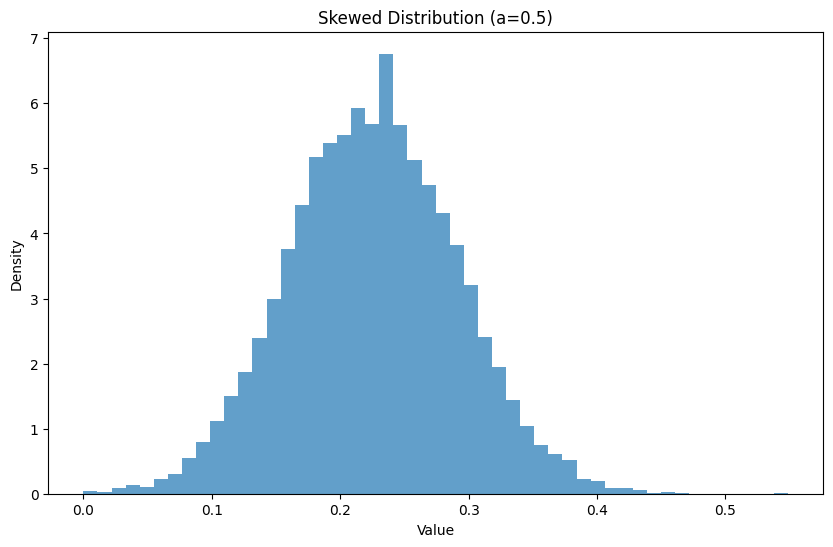

Mean: 0.22544849549839854
Median: 0.22555847052722794


In [ ]:

# Parameters to center distribution at 0.3
loc = 0.2  # location parameter (mean)
scale = 0.07  # spread of distribution
a = 0.5  # skew parameter

# Generate skewed distribution
skewed_data = stats.skewnorm.rvs(a, loc=loc, scale=scale, size=10000)

# Clip values between 0 and 1
skewed_data = np.clip(skewed_data, 0, 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(skewed_data, bins=50, density=True, alpha=0.7)
plt.title(f'Skewed Distribution (a={a})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Print some statistics
print(f"Mean: {np.mean(skewed_data)}")
print(f"Median: {np.median(skewed_data)}")
